In [110]:
import pandas as pd
from numpy.random import * 
from scipy.stats import lognorm

%matplotlib inline

In [155]:
def r(x): return round(x, 4)

def variance(mu, sigma):
    a = np.exp(sigma**2) - 1
    b = np.exp((2*mu)+(sigma**2))
    return a*b

def stats(s):
    print("sampled mean:", r(np.mean(s)))
    print("sampled median:", r(np.median(s)))
    print("percentiles:", r(np.percentile(s, 0.025)), r(np.percentile(s, 0.975)))

sampled mean: 2.3261
sampled median: 2.237
percentiles: 0.7467 1.1007
0.51037571345994


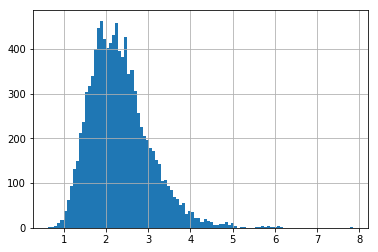

In [149]:
samples = 10000
mean = 0.8
sigma = 0.3
dist = pd.Series(lognormal(mean, sigma, samples))
stats(dist)
dist.hist(bins=100)
print(variance(sigma, mean))
# True distribution

mean: 0.8022773562495238
sigma: 0.3015245080564935
sampled mean: 2.3423
sampled median: 2.2337
percentiles: 0.7936 1.1035


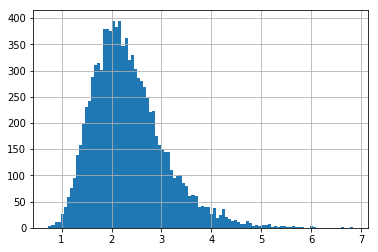

In [130]:
# Fit data directly
shape, loc, scale = lognorm.fit(dist, floc=0)
print("mean:", np.log(scale))
print("sigma:", shape)
dist_direct = pd.Series(lognormal(np.log(scale), shape, samples))
stats(dist_direct)
dist_direct.hist(bins=100)

sampled mean: 2.3308
sampled median: 2.2335
percentiles: 0.7934 1.1077


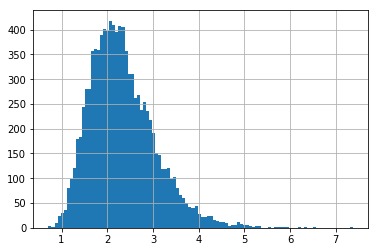

In [161]:
def bootstrap(d):
    sims = 1000
    draws_per_loop = 10
    boot_samples = []
    
    for i in range(sims):
        d_ = d.sample(frac=1.0, replace=True)
        shape, loc, scale = lognorm.fit(d_, floc=0)
        boot_samples.extend(lognormal(np.log(scale), shape, draws_per_loop))
    
    return boot_samples
          
    
boot_dist = pd.Series(bootstrap(dist))
stats(boot_dist)
boot_dist.hist(bins=100)

In [187]:
def bootstrap(d):
    sims = 1000
    draws_per_loop = 10
    boot_samples = []
    
    for i in range(sims):
        d_ = d.sample(frac=1.0, replace=True)
        shape, loc, scale = lognorm.fit(d_, floc=0)
        boot_samples.extend(lognormal(np.log(scale), shape, draws_per_loop))
    
    return boot_samples

true_mean = []
true_variance = []

fit_mean = []
fit_variance = []
fit_lower = []
fit_upper = []

boot_mean = []
boot_variance = []
boot_lower = []
boot_upper = []

for i in range(100):
    samples = 1000
    mean = 0.8
    sigma = 0.3
    
    true = lognormal(mean, sigma, samples)
    true_mean.append(np.mean(true))
    true_variance.append(variance(mean, sigma))
    
    direct_fit = lognorm.fit(true, floc=0)
    dist_direct = lognormal(np.log(direct_fit[2]), direct_fit[0], samples)
    fit_mean.append(np.mean(dist_direct))
    fit_variance.append(np.var(dist_direct))
    fit_lower.append(np.percentile(dist_direct, 0.025))
    fit_upper.append(np.percentile(dist_direct, 0.975))
    
    boot_samples = bootstrap(pd.Series(true))
    boot_mean.append(np.mean(boot_samples))
    boot_variance.append(np.var(boot_samples))
    boot_lower.append(np.percentile(boot_samples, 0.025))
    boot_upper.append(np.percentile(boot_samples, 0.975))

    
    
    
df = pd.DataFrame({'true_mean': true_mean,
                   'true_var': true_variance,
                   'fit_mean': fit_mean,
                   'fit_var': fit_variance,
                   'fit_lower': fit_lower,
                   'fit_upper': fit_upper,
                   'boot_mean': boot_mean,
                   'boot_var': boot_variance,
                   'boot_lower': boot_lower,
                   'boot_upper': boot_upper})   
  

In [188]:
df.mean()

true_mean     2.328193
true_var      0.510376
fit_mean      2.327628
fit_var       0.512245
fit_lower     0.870785
fit_upper     1.112286
boot_mean     2.327787
boot_var      0.511386
boot_lower    0.792564
boot_upper    1.105213
dtype: float64